# Data Science Capstone Project


### This notebook is contains the IBM Data Science Capstone Project
#### 

## 1. Importing all Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from bs4 import BeautifulSoup 
import requests
from geopy.geocoders import Nominatim
import folium
import matplotlib.pyplot as plt
import seaborn as sns

# 
## 2. Importing Hospital Admission Dataset

In [2]:
hospital = pd.read_excel('hospital.xls')
hospital = hospital.iloc[14:,:]
hospital = hospital.iloc[1:,1:8]
#hospital.head()
hospital = hospital.reset_index().drop(['index'], axis = 1)
hospital.drop(['Unnamed: 2', 'Unnamed: 3'], axis = 1, inplace = True)
hospital.columns = ['Neighbourhood', 'Population', 'Male Admission', 'Female Admission', 'Both Admission']

#hospital['Neighbourhood'] = hospital['Neighbourhood'].str.replace('-', ' ')
#test.head(20)

hospital.head()

,Neighbourhood,Population,Male Admission,Female Admission,Both Admission
0,West Humber-Clairville,34080,2453,3151,5604
1,Mount Olive-Silverstone-Jamestown,32675,2256,3004,5260
2,Thistletown-Beaumond Heights,10140,953,1153,2106
3,Rexdale-Kipling,10455,938,1090,2028
4,Elms-Old Rexdale,9970,674,978,1652


# 
## 3. Integrating Neighborhoods with their respective Locations


In [3]:
T_lat = []
T_log = []
for index, row in hospital.iterrows():
    neighbor = row['Neighbourhood']
    address = '{}, Toronto, ON, Canada'.format(neighbor)
    geolocator = Nominatim(user_agent = 'to_explorer')
    location = geolocator.geocode(address)
    if location is None:
        #pass
        T_lat.append(np.nan)
        T_log.append(np.nan)
        print('{} location not found'.format(row['Neighbourhood']))
    else:
        T_lat.append(location.latitude)
        T_log.append(location.longitude)
        print('{} location is {}, {}'.format(row['Neighbourhood'], location.latitude, location.longitude))



West Humber-Clairville location is 43.72337025, -79.59745741095173
Mount Olive-Silverstone-Jamestown location not found
Thistletown-Beaumond Heights location not found
Rexdale-Kipling location is 43.722114149999996, -79.57229244708017
Elms-Old Rexdale location is 43.72176985, -79.55217331972301
Kingsview Village-The Westway location not found
Willowridge-Martingrove-Richview location not found
Humber Heights-Westmount location is 43.6957852, -79.5208324
Edenbridge-Humber Valley location is 43.670672, -79.5188545
Princess-Rosethorn location not found
Eringate-Centennial-West Deane location not found
Markland Wood location is 43.63123865, -79.58543401986114
Etobicoke West Mall location is 43.6435491, -79.56532534553605
Islington-City Centre West location is 43.6625768, -79.5317888
Kingsway South location is 43.6473811, -79.5113328
Stonegate-Queensway location not found
Mimico location is 43.6166773, -79.4968048
New Toronto location is 43.6007625, -79.505264
Long Branch location is 43.592

In [4]:
hospital['Latitudes'] = T_lat
hospital['Longitudes'] = T_log
hospital.head(10)

,Neighbourhood,Population,Male Admission,Female Admission,Both Admission,Latitudes,Longitudes
0,West Humber-Clairville,34080,2453,3151,5604,43.723370,-79.597457
1,Mount Olive-Silverstone-Jamestown,32675,2256,3004,5260,NaN,NaN
2,Thistletown-Beaumond Heights,10140,953,1153,2106,NaN,NaN
3,Rexdale-Kipling,10455,938,1090,2028,43.722114,-79.572292
4,Elms-Old Rexdale,9970,674,978,1652,43.721770,-79.552173
5,Kingsview Village-The Westway,21585,1713,2253,3966,NaN,NaN
6,Willowridge-Martingrove-Richview,21310,1689,2211,3900,NaN,NaN
7,Humber Heights-Westmount,10600,950,1335,2285,43.695785,-79.520832
8,Edenbridge-Humber Valley,14895,1029,1269,2298,43.670672,-79.518855
9,Princess-Rosethorn,11200,708,865,1573,NaN,NaN


In [5]:
hospital.dropna(inplace = True, axis = 0)
hospital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 139
Data columns (total 7 columns):
Neighbourhood       105 non-null object
Population          105 non-null object
Male Admission      105 non-null object
Female Admission    105 non-null object
Both Admission      105 non-null object
Latitudes           105 non-null float64
Longitudes          105 non-null float64
dtypes: float64(2), object(5)
memory usage: 6.6+ KB


In [6]:
hospital.head()

,Neighbourhood,Population,Male Admission,Female Admission,Both Admission,Latitudes,Longitudes
0,West Humber-Clairville,34080,2453,3151,5604,43.723370,-79.597457
3,Rexdale-Kipling,10455,938,1090,2028,43.722114,-79.572292
4,Elms-Old Rexdale,9970,674,978,1652,43.721770,-79.552173
7,Humber Heights-Westmount,10600,950,1335,2285,43.695785,-79.520832
8,Edenbridge-Humber Valley,14895,1029,1269,2298,43.670672,-79.518855


2737.361904761905

In [53]:
avg_admission = hospital['Population'].mean()
neigh_hosp = folium.Map(location = [latitude, longitude], zoom_start=11)

for lat, lng, neigh, admit in zip(hospital['Latitudes'], hospital['Longitudes'], hospital['Neighbourhood'], hospital['Both Admission']):
    label = '{} Admitted in: {}'.format(admit,neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 100*(admit/avg_admission),
        popup= label,
        color = 'purple',
        fill = True,
        fill_color = 'purple',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(neigh_hosp)

#neigh_hosp.save('Images/Neighborhood Hospital Distribution.html')
neigh_hosp

# 
## 4. Scraping the Income Sets

In [7]:
url = 'https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/TableMatchingCriteria?GeographyType=MetropolitanMajorArea&GeographyId=2270&CategoryLevel1=Population%2C%20Households%20and%20Housing%20Stock&CategoryLevel2=Household%20Income&ColumnField=HouseholdIncomeRange&RowField=Neighbourhood&SearchTags%5B0%5D.Key=Households&SearchTags%5B0%5D.Value=Number&SearchTags%5B1%5D.Key=Statistics&SearchTags%5B1%5D.Value=AverageAndMedian'
r = requests.get(url).text
soup = BeautifulSoup(r)


In [8]:
Neighbourhood = []
Income = []
table =soup.find(class_ = 'CawdDataTable')
table = table.tbody
table = table.find_all('tr')
#print(table)
for row in table:
    #print(row)
    row_list = row.text.strip().split('\n')
    #print(row_list)
    Neighbourhood.append(row_list[0])
    Income.append(row_list[3].replace(',', ''))
    
ni_dict = {'Neighbourhood': Neighbourhood, 'Income': Income}
NI_df = pd.DataFrame(ni_dict)
NI_df.head(10)

,Neighbourhood,Income
0,Agincourt/Malvern,71025
1,Ajax/Pickering,94805
2,Alderwood,84163
3,Aurora,113594
4,Banbury-Don Mills/York Mills,168106
5,Bathurst Manor,79185
6,Bay Street Corridor,65786
7,Bayview Village,76983
8,Bayview Woods-Steeles/Hillcrest Village,79794
9,Bedford Park-Nortown,175773


# 
## 5. Merging Neighborhoods and their Income (Left Join)

In [9]:
df = pd.merge(hospital, NI_df,on='Neighbourhood', how = 'left')

In [10]:
df['Income'] = df['Income'].astype(float)
df.head(10)

,Neighbourhood,Population,Male Admission,Female Admission,Both Admission,Latitudes,Longitudes,Income
0,West Humber-Clairville,34080,2453,3151,5604,43.723370,-79.597457,71699.0
1,Rexdale-Kipling,10455,938,1090,2028,43.722114,-79.572292,64800.0
2,Elms-Old Rexdale,9970,674,978,1652,43.721770,-79.552173,63156.0
3,Humber Heights-Westmount,10600,950,1335,2285,43.695785,-79.520832,76669.0
4,Edenbridge-Humber Valley,14895,1029,1269,2298,43.670672,-79.518855,144418.0
5,Markland Wood,10395,804,944,1748,43.631239,-79.585434,NaN
6,Etobicoke West Mall,11005,821,1058,1879,43.643549,-79.565325,80527.0
7,Islington-City Centre West,38130,2829,3966,6795,43.662577,-79.531789,NaN
8,Kingsway South,9170,607,745,1352,43.647381,-79.511333,198998.0
9,Mimico,26635,1758,2080,3838,43.616677,-79.496805,71772.0


In [11]:
df[['Income']].describe().loc['25%',:]

Income    61907.0
Name: 25%, dtype: float64

# 
## 6. Exploring the Neighborhoods
### Connecting with Foursquare and explore nearby locations

In [12]:
CLIENT_ID = 'PJNJYWCFXQMKPTAHTRMWUGE3YMCVYDF5DM3JXCPEHFUHZJRV' # your Foursquare ID
CLIENT_SECRET = 'XUKXQKX21CULKQXCPD3D5CDEVIM4COJBMDWBJY2ZH0PFKYEA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value


In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)  


# calling functions
toronto_venues = getNearbyVenues(names = df['Neighbourhood'],
                                 latitudes = df['Latitudes'],
                                 longitudes = df['Longitudes'])

West Humber-Clairville
Rexdale-Kipling
Elms-Old Rexdale
Humber Heights-Westmount
Edenbridge-Humber Valley
Markland Wood
Etobicoke West Mall
Islington-City Centre West
Kingsway South
Mimico
New Toronto
Long Branch
Alderwood
Humber Summit
Black Creek
Glenfield-Jane Heights
York University Heights
Rustic
Maple Leaf
Yorkdale-Glen Park
Englemount-Lawrence
Bathurst Manor
Newtonbrook West
Willowdale West
Lansing-Westgate
St.Andrew-Windfields
Banbury-Don Mills
Victoria Village
Flemingdon Park
Pleasant View
Don Valley Village
Hillcrest Village
Bayview Woods-Steeles
Newtonbrook East
Willowdale East
Bayview Village
Henry Farm
O'Connor-Parkview
Thorncliffe Park
Leaside-Bennington
Broadview North
Old East York
Danforth-East York
Taylor-Massey
East End-Danforth
The Beaches
Danforth
Playter Estates-Danforth
North Riverdale
South Riverdale
Regent Park
Moss Park
Church-Yonge Corridor
Bay Street Corridor
University
Palmerston-Little Italy
Trinity-Bellwoods
Niagara
Dufferin Grove
Little Portugal
South Pa

In [14]:
toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,West Humber-Clairville,43.72337,-79.597457,Fortinos,43.721438,-79.596291,Grocery Store
1,West Humber-Clairville,43.72337,-79.597457,Mandarin Buffet,43.720360,-79.594387,Chinese Restaurant
2,West Humber-Clairville,43.72337,-79.597457,Humber Arboretum,43.724653,-79.608006,Garden
3,West Humber-Clairville,43.72337,-79.597457,Bulk Barn,43.720290,-79.600887,Food & Drink Shop
4,West Humber-Clairville,43.72337,-79.597457,New York Fries - Woodbine Centre,43.720568,-79.599609,Restaurant
5,West Humber-Clairville,43.72337,-79.597457,TD Canada Trust,43.719630,-79.599896,Bank
6,West Humber-Clairville,43.72337,-79.597457,Winners,43.719819,-79.594923,Department Store
7,West Humber-Clairville,43.72337,-79.597457,Woodbine Racetrack,43.716673,-79.604962,Racecourse
8,West Humber-Clairville,43.72337,-79.597457,Xawaash,43.715786,-79.593053,Mediterranean Restaurant
9,West Humber-Clairville,43.72337,-79.597457,Dairy Queen,43.730244,-79.601391,Ice Cream Shop


In [15]:
toronto_pharmacy = toronto_venues[toronto_venues['Venue Category'] == 'Pharmacy'].reset_index().drop('index', axis = 1)
toronto_pharmacy.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Humber Heights-Westmount,43.695785,-79.520832,Shoppers Drug Mart,43.701264,-79.519705,Pharmacy
1,Edenbridge-Humber Valley,43.670672,-79.518855,Shoppers Drug Mart,43.661721,-79.518881,Pharmacy
2,Etobicoke West Mall,43.643549,-79.565325,Shoppers Drug Mart,43.641312,-79.576924,Pharmacy
3,Islington-City Centre West,43.662577,-79.531789,Shoppers Drug Mart,43.663067,-79.531753,Pharmacy
4,Islington-City Centre West,43.662577,-79.531789,Thorncrest Drug Store,43.662988,-79.531817,Pharmacy


In [16]:
toronto_pharmacy.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Humber Heights-Westmount,43.695785,-79.520832,Shoppers Drug Mart,43.701264,-79.519705,Pharmacy
1,Edenbridge-Humber Valley,43.670672,-79.518855,Shoppers Drug Mart,43.661721,-79.518881,Pharmacy
2,Etobicoke West Mall,43.643549,-79.565325,Shoppers Drug Mart,43.641312,-79.576924,Pharmacy
3,Islington-City Centre West,43.662577,-79.531789,Shoppers Drug Mart,43.663067,-79.531753,Pharmacy
4,Islington-City Centre West,43.662577,-79.531789,Thorncrest Drug Store,43.662988,-79.531817,Pharmacy
5,Kingsway South,43.647381,-79.511333,Shoppers Drug Mart,43.647623,-79.510860,Pharmacy
6,New Toronto,43.600763,-79.505264,Shoppers Drug Mart,43.601677,-79.502239,Pharmacy
7,Long Branch,43.592005,-79.545365,Rexall,43.593111,-79.538327,Pharmacy
8,Alderwood,43.601717,-79.545232,Sav-On Drug Mart,43.609891,-79.549618,Pharmacy
9,Glenfield-Jane Heights,43.756799,-79.518050,Shoppers Drug Mart,43.756147,-79.515843,Pharmacy


##### Getting the latitudes and longitudes of Toronto

In [17]:
address = 'Toronto, ON, Canada'
geolocator = Nominatim(user_agent = 'to_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates are {},{}'.format(latitude, longitude))

The geographical coordinates are 43.6534817,-79.3839347


In [49]:
my_map = folium.Map(location = [latitude, longitude], zoom_start=11)

for lat, lng, venue, neigh, in zip(toronto_pharmacy['Venue Latitude'], toronto_pharmacy['Venue Longitude'], toronto_pharmacy['Venue'], toronto_pharmacy['Neighborhood']):
    label = '{}, {}'.format(venue, neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup= label,
        color = 'red',
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(my_map)
my_map.save('Images/Pharmacies in Toronto.html')
my_map

## 7. Neighborhoods with most Pharmacy Shops

In [19]:
pharmacy_count = pd.DataFrame(toronto_pharmacy['Neighborhood'].value_counts())
pharmacy_count.columns = ['No. of Pharmacy']
pharmacy_count.head(10)

,No. of Pharmacy
South Parkdale,3
Dovercourt-Wallace Emerson-Junction,2
York University Heights,2
Morningside,2
Mount Pleasant East,2
Runnymede-Bloor West Village,2
Islington-City Centre West,2
Tam O'Shanter-Sullivan,2
Englemount-Lawrence,2
Willowdale East,2


# 
## 8. Neighborhoods without Pharmacy Shops

In [20]:
pharma_neigh_set = set(toronto_pharmacy['Neighborhood'])
all_neigh = set(df['Neighbourhood'])
no_pharma_neigh  = all_neigh - pharma_neigh_set
neighbor_without_pharmacy = df[df['Neighbourhood'].isin(no_pharma_neigh)]
neighbor_without_pharmacy.head()

,Neighbourhood,Population,Male Admission,Female Admission,Both Admission,Latitudes,Longitudes,Income
0,West Humber-Clairville,34080,2453,3151,5604,43.723370,-79.597457,71699.0
1,Rexdale-Kipling,10455,938,1090,2028,43.722114,-79.572292,64800.0
2,Elms-Old Rexdale,9970,674,978,1652,43.721770,-79.552173,63156.0
5,Markland Wood,10395,804,944,1748,43.631239,-79.585434,NaN
9,Mimico,26635,1758,2080,3838,43.616677,-79.496805,71772.0


In [50]:
neighbor_without_pharmacy.shape

(42, 8)

In [21]:
map_without_pharma = folium.Map(location = [latitude, longitude], zoom_start=11)

for lat, lng, neigh, in zip(neighbor_without_pharmacy['Latitudes'], neighbor_without_pharmacy['Longitudes'], neighbor_without_pharmacy['Neighbourhood']):
    label = '{}'.format(neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup= label,
        color = 'green',
        fill = True,
        fill_color = 'green',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_without_pharma)
map_without_pharma

# 
## 9. Neighborhoods with Pharmacy Shops

In [22]:
neighbor_with_pharmacy = df[df['Neighbourhood'].isin(pharma_neigh_set)]
neighbor_with_pharmacy.head()

,Neighbourhood,Population,Male Admission,Female Admission,Both Admission,Latitudes,Longitudes,Income
3,Humber Heights-Westmount,10600,950,1335,2285,43.695785,-79.520832,76669.0
4,Edenbridge-Humber Valley,14895,1029,1269,2298,43.670672,-79.518855,144418.0
6,Etobicoke West Mall,11005,821,1058,1879,43.643549,-79.565325,80527.0
7,Islington-City Centre West,38130,2829,3966,6795,43.662577,-79.531789,NaN
8,Kingsway South,9170,607,745,1352,43.647381,-79.511333,198998.0


#### Pharmacies and Neighborhoods without pharmacy

In [59]:
map_with_out_pharma = folium.Map(location = [latitude, longitude], zoom_start=11)

for lat, lng, venue, neigh, in zip(toronto_pharmacy['Venue Latitude'], toronto_pharmacy['Venue Longitude'], toronto_pharmacy['Venue'], toronto_pharmacy['Neighborhood']):
    label = '{}, {}'.format(venue, neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup= label,
        color = 'red',
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_with_out_pharma)


total_admission = sum(hospital['Both Admission'])
for lat, lng, neigh, admit in zip(neighbor_without_pharmacy['Latitudes'], neighbor_without_pharmacy['Longitudes'], neighbor_without_pharmacy['Neighbourhood'], neighbor_without_pharmacy['Both Admission']):
    label = '{}'.format(neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 1000*(admit/total_admission),
        popup= label,
        color = 'green',
        fill = True,
        fill_color = 'green',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_with_out_pharma)

#map_with_out_pharma.save('Images/Pharmacies(Red), and Neighborhoods with no Pharmacy(Green).html')
map_with_out_pharma

## 10. Hospitals in Toronto

In [24]:
address = 'Baycrest Health Sciences, Toronto, ON, Canada'
geolocator = Nominatim(user_agent = 'to_explorer')
location = geolocator.geocode(address)
l1 = location.latitude
l2 = location.longitude
print('The geographical coordinates are {},{}'.format(l1, l2))

The geographical coordinates are 43.7302646,-79.43409194469027


### Scraping for the names of Hospitals in Toronto Ontario

In [25]:
name_list = []

h_url = 'https://en.wikipedia.org/wiki/List_of_hospitals_in_Toronto'
rq = requests.get(h_url).text
soup = BeautifulSoup(rq)
table = soup.find_all('table')
table = table[0]
table = table.find_all('tr')[1:]
for name in table:
    name_list.append(name.find('td').text)

In [26]:
h_lat = []
h_lng = []
for name in name_list:
    address = '{}, Toronto, ON, Canada'.format(name)
    geolocator = Nominatim(user_agent = 'to_explorer')
    location = geolocator.geocode(address)
    if location is None:
        l1 = np.nan
        l2 = np.nan
    else:
        l1 = location.latitude
        l2 = location.longitude
    h_lat.append(l1)
    h_lng.append(l2)
    print('{} geographical coordinates are {},{}'.format(name, l1, l2))
    
hos_dict = {'Hospital Name': name_list, 'Hospital Latitide': h_lat, 'Hospital Longitude': h_lng}
hospital_df = pd.DataFrame(hos_dict)
hospital_df.head()

Baycrest Health Sciences geographical coordinates are 43.7302646,-79.43409194469027
Bellwood Health Services geographical coordinates are nan,nan
Bridgepoint Active Healthcare geographical coordinates are 43.666546350000004,-79.35458007170948
Casey House geographical coordinates are 43.668927249999996,-79.37840347550002
Centre for Addiction and Mental Health, College Street Site geographical coordinates are nan,nan
Centre for Addiction and Mental Health, Queen Street Site geographical coordinates are nan,nan
Centre for Addiction and Mental Health, Russell Street Site geographical coordinates are nan,nan
Centric Health Surgical Centre Toronto geographical coordinates are nan,nan
Etobicoke General Hospital geographical coordinates are 43.7290756,-79.59788584813774
Holland Bloorview Kids Rehabilitation Hospital geographical coordinates are 43.7184671,-79.37347984846242
Hospital for Sick Children geographical coordinates are 43.657371749999996,-79.38760057839349
Humber River Hospital, Wils

,Hospital Name,Hospital Latitide,Hospital Longitude
0,Baycrest Health Sciences,43.730265,-79.434092
1,Bellwood Health Services,NaN,NaN
2,Bridgepoint Active Healthcare,43.666546,-79.354580
3,Casey House,43.668927,-79.378403
4,"Centre for Addiction and Mental Health, Colleg...",NaN,NaN


In [27]:
# Bellwood Health Serivces
hospital_df.iloc[1,1] = 43.719979509908484
hospital_df.iloc[1,2] = -79.36652390739894

# Centre for Addiction and Mental Health, Queen
hospital_df.iloc[5,1] = 43.64288627678428
hospital_df.iloc[5,2] = -79.41843106439363

# Centric Health Surgical Centre Toronto
hospital_df.iloc[7,1] = 43.72405433696723
hospital_df.iloc[7,2] = -79.3361659227796

# Humber River Hospital, Wilson Site
hospital_df.iloc[11,1] = 43.724125146526454
hospital_df.iloc[11,2] = -79.48818348653575

# North York General Hospital, Branson Centre
hospital_df.iloc[15,1] = 43.77240828098524 
hospital_df.iloc[15,2] = -79.44746924602813

# North York General Hospital, Seniors' Health Care Center
hospital_df.iloc[16,1] = 43.77311766153121
hospital_df.iloc[16,2] = -79.35992902884257

# Princess Margaret Cancer Centre	
hospital_df.iloc[17,1] = 43.65838892886005
hospital_df.iloc[17,2] = -79.39060403104092

# Scarborough General Hospital	
hospital_df.iloc[22,1] = 43.75637626665658
hospital_df.iloc[22,2] = -79.2468913310374

# Sunnybrook Health Sciences Centre	
hospital_df.iloc[26,1] = 43.72291120820059
hospital_df.iloc[26,2] = -79.37296965987429

# St. John's Rehab Hospital
hospital_df.iloc[28,1] = 43.78764260322017
hospital_df.iloc[28,2] = -79.40396037336495

# Toronto Grace Health Centre
hospital_df.iloc[30,1] = 43.67058427072321
hospital_df.iloc[30,2] = -79.38314054453343

# Toronto Rehabilitation Institute: Bickle Centr
hospital_df.iloc[31,1] = 'Toronto Rehabilitation Institute'
hospital_df.iloc[31,1] = 43.65681112810011
hospital_df.iloc[31,2] = -79.38979507115174

hospital_df.head(40)

,Hospital Name,Hospital Latitide,Hospital Longitude
0,Baycrest Health Sciences,43.7303,-79.434092
1,Bellwood Health Services,43.72,-79.366524
2,Bridgepoint Active Healthcare,43.6665,-79.354580
3,Casey House,43.6689,-79.378403
4,"Centre for Addiction and Mental Health, Colleg...",NaN,NaN
5,"Centre for Addiction and Mental Health, Queen ...",43.6429,-79.418431
6,"Centre for Addiction and Mental Health, Russel...",NaN,NaN
7,Centric Health Surgical Centre Toronto,43.7241,-79.336166
8,Etobicoke General Hospital,43.7291,-79.597886
9,Holland Bloorview Kids Rehabilitation Hospital,43.7185,-79.373480


In [28]:
hospital_df.dropna(inplace = True, axis = 0)
hospital_df.head()

,Hospital Name,Hospital Latitide,Hospital Longitude
0,Baycrest Health Sciences,43.7303,-79.434092
1,Bellwood Health Services,43.72,-79.366524
2,Bridgepoint Active Healthcare,43.6665,-79.354580
3,Casey House,43.6689,-79.378403
5,"Centre for Addiction and Mental Health, Queen ...",43.6429,-79.418431


# 
## Map Visualizations
# 

## 11. Visualizing the Neighborhoods, Pharmacies, and Major Hospitals of Toronto

### 
we visualize all the pharmacies in Toronto area, Neighborhoods without Pharmacies and the major Hospitals of the Toronto City


In [62]:
map_with_out_pharma = folium.Map(location = [latitude, longitude], zoom_start=11)

for lat, lng, venue, neigh, in zip(toronto_pharmacy['Venue Latitude'], toronto_pharmacy['Venue Longitude'], toronto_pharmacy['Venue'], toronto_pharmacy['Neighborhood']):
    label = '{}, {}'.format(venue, neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup= label,
        color = 'red',
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_with_out_pharma)




for lat, lng, neigh, admit in zip(neighbor_without_pharmacy['Latitudes'], neighbor_without_pharmacy['Longitudes'], neighbor_without_pharmacy['Neighbourhood'], neighbor_without_pharmacy['Both Admission']):
    label = '{}'.format(neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 1000*(admit/total_admission),
        popup= label,
        color = 'green',
        fill = True,
        fill_color = 'green',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_with_out_pharma)

    
for lat, lng, name, in zip(hospital_df['Hospital Latitide'], hospital_df['Hospital Longitude'], hospital_df['Hospital Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 10,
        popup= label,
        color = 'blue',
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_with_out_pharma)

print('Red Circle: Pharmacy Shops')
print('Green Circle: Neighborhoods without Pharmacies')
print('Blue Circle: Major Hospitals')
#map_with_out_pharma.save('Images/Hospitals, Pharmacies, Neighborhoods with no Pharmacies.html')
map_with_out_pharma

Red Circle: Pharmacy Shops
Green Circle: Neighborhoods without Pharmacies
Blue Circle: Major Hospitals


## 12. Narrowing Down our results

In [30]:
admission20 = neighbor_without_pharmacy.sort_values('Both Admission', ascending = False).head(20).reset_index().drop('index', axis=1)
admission20.head()

,Neighbourhood,Population,Male Admission,Female Admission,Both Admission,Latitudes,Longitudes,Income
0,West Humber-Clairville,34080,2453,3151,5604,43.723370,-79.597457,71699.0
1,Annex,28615,2009,2487,4496,43.670338,-79.407117,NaN
2,South Riverdale,25615,1886,2535,4421,43.660650,-79.342718,NaN
3,Black Creek,22040,1659,2297,3956,43.695400,-79.485495,57082.0
4,Mimico,26635,1758,2080,3838,43.616677,-79.496805,71772.0


In [31]:
map_admission10 = folium.Map(location = [latitude, longitude], zoom_start=11)

for lat, lng, name, in zip(hospital_df['Hospital Latitide'], hospital_df['Hospital Longitude'], hospital_df['Hospital Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 10,
        popup= label,
        color = 'blue',
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_admission10)


for lat, lng, neigh, in zip(admission20['Latitudes'], admission20['Longitudes'], admission20['Neighbourhood']):
    label = '{}'.format(neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup= label,
        color = 'green',
        fill = True,
        fill_color = 'green',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_admission10)

map_admission10

In [32]:
df.sort_values('Population', ascending = False).head(10).reset_index().drop('index', axis=1)

,Neighbourhood,Population,Male Admission,Female Admission,Both Admission,Latitudes,Longitudes,Income
0,Woburn,53280,3337,4652,7989,43.759824,-79.225291,62213.0
1,Rouge,45840,1277,1918,3195,43.804930,-79.165837,97714.0
2,Malvern,44950,1888,2728,4616,43.809196,-79.221701,NaN
3,L'Amoreaux,44950,2710,3664,6374,43.799003,-79.305967,NaN
4,Willowdale East,44875,1323,1942,3265,43.761510,-79.410923,NaN
5,Islington-City Centre West,38130,2829,3966,6795,43.662577,-79.531789,NaN
6,Dovercourt-Wallace Emerson-Junction,34710,2273,2773,5046,43.668005,-79.441339,NaN
7,West Humber-Clairville,34080,2453,3151,5604,43.723370,-79.597457,71699.0
8,Glenfield-Jane Heights,31430,2414,3176,5590,43.756799,-79.518050,NaN
9,Agincourt North,30310,1303,1754,3057,43.808038,-79.266439,NaN


In [67]:
admission5 = neighbor_without_pharmacy.sort_values('Both Admission', ascending = False).head(5).reset_index().drop('index', axis=1)
#admission.head()
map_admission5 = folium.Map(location = [latitude, longitude], zoom_start=11)

for lat, lng, venue, neigh, in zip(toronto_pharmacy['Venue Latitude'], toronto_pharmacy['Venue Longitude'], toronto_pharmacy['Venue'], toronto_pharmacy['Neighborhood']):
    label = '{}, {}'.format(venue, neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup= label,
        color = 'red',
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_admission5)



for lat, lng, name, in zip(hospital_df['Hospital Latitide'], hospital_df['Hospital Longitude'], hospital_df['Hospital Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 2,
        popup= label,
        color = 'blue',
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_admission5)


for lat, lng, neigh, admit in zip(admission5['Latitudes'], admission5['Longitudes'], admission5['Neighbourhood'], admission5['Both Admission']):
    label = '{}'.format(neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 1000*(admit/total_admission),
        popup= label,
        color = 'green',
        fill = True,
        fill_color = 'green',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_admission5)

#map_admission5.save('Images/map of top5 recommedations.html')
map_admission5


In [34]:
admission5.head(5)

,Neighbourhood,Population,Male Admission,Female Admission,Both Admission,Latitudes,Longitudes,Income
0,West Humber-Clairville,34080,2453,3151,5604,43.723370,-79.597457,71699.0
1,Annex,28615,2009,2487,4496,43.670338,-79.407117,NaN
2,South Riverdale,25615,1886,2535,4421,43.660650,-79.342718,NaN
3,Black Creek,22040,1659,2297,3956,43.695400,-79.485495,57082.0
4,Mimico,26635,1758,2080,3838,43.616677,-79.496805,71772.0


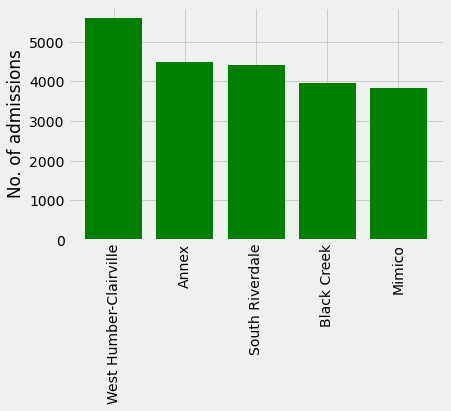

In [71]:
plt.bar(admission5['Neighbourhood'], admission5['Both Admission'], color = 'g')
plt.ylabel('No. of admissions')
plt.xticks(rotation= 90)
plt.style.use('fivethirtyeight')
#plt.savefig('Most Populated but no Pharmacies.png')
plt.show()

# 
### Conclusion

##### We have set following evaluation criteria
###### i. No Pharmacy stores available: Less the number of pharmacies, less the number of competitions.
###### ii.	Number of Hospital around: If there are hospitals around, store is more likely to run at higher pace
###### iii.	Number of Hospital Admissions: In neighborhood where more people are admitted, the pharmacies is more likely to operate more because of higher demands of medications.
###### iv.	Population Size:  Higher the population, larger the market size is.


Based upon our results and evaluation criteria, it seems there is high demand of Community Pharmacy in West Humber-Clairville. This neighborhood has the maximum admission rate, it has large number of populations, and within several miles there are no any Community Pharmacy around. So, there is less competition, high demand of drugs, and the market is large. We’ll like to recommend South River Dale and Black Creek as honorable mentions which can be considered for future extensions.
